In [1]:
import pandas as pd
import sqlite3
import datetime

# Creamos la conexión con la base de datos
con = sqlite3.connect("seviBikes.db")
cur = con.cursor()

# Seleccionamos los datos
cur.execute("SELECT * From seviBikes")

# Lo almacenamos en una lista
data = cur.fetchall()
con.close()

In [85]:
# Creamos el dataframe
df = pd.DataFrame(data)
df=df.dropna()
df.head(5)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435467 entries, 0 to 2444890
Data columns (total 16 columns):
0     object
1     int64
2     int64
3     int64
4     int64
5     int64
6     object
7     float64
8     object
9     int64
10    float64
11    float64
12    object
13    object
14    object
15    object
dtypes: float64(3), int64(6), object(7)
memory usage: 315.9+ MB


In [86]:
# Renombramos las columnas
df.columns=["address","available_bike_stands","available_bikes","banking","bike_stands","bonus","contract_name",\
            "last_update","name","number","position_lat","position_lng","status","day","date_time","hour"]
df.head(10)


,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position_lat,position_lng,status,day,date_time,hour
0,CALLE PARQUE DE DOÑANA - Aprox. Calle Corral d...,14,5,1,20,0,seville,1.581095e+12,194_CALLE PARQUE DE DOÑANA,194,37.418733,-5.973194,OPEN,Friday,2020-02-07 16:59:13,16
1,AVENIDA REINA MERCEDES - Aprox. Facultad de In...,19,6,1,25,0,seville,1.581095e+12,126_AVENIDA REINA MERCEDES,126,37.358165,-5.986483,OPEN,Friday,2020-02-07 17:00:49,17
2,PLAZA SAN AGUSTIN - Aprox. C/ Concepción,10,4,1,15,0,seville,1.581095e+12,073_PLAZA SAN AGUSTIN,73,37.389514,-5.984363,OPEN,Friday,2020-02-07 16:59:07,16
3,CALLE ORFEBRE DOMINGUEZ VÁZQUEZ - Aprox. C/ Pi...,14,6,1,20,0,seville,1.581095e+12,186_CALLE ORFEBRE DOMINGUEZ VÁZQUEZ,186,37.408605,-5.973161,OPEN,Friday,2020-02-07 17:03:50,17
4,PASEO CATALINA RIBERA - Aprox. C/ San Fernando,1,19,1,20,0,seville,1.581095e+12,100_PASEO CATALINA RIBERA,100,37.381516,-5.988999,OPEN,Friday,2020-02-07 17:06:09,17
5,CALLE BETIS - Aprox. C/ Juan de Lugo,0,19,1,19,0,seville,1.581095e+12,096_CALLE BETIS,96,37.383541,-5.999911,OPEN,Friday,2020-02-07 16:59:34,16
6,CALLE PAEZ DE RIVERA - Aprox. Paseo de la Palmera,15,5,1,20,0,seville,1.581095e+12,132_CALLE PAEZ DE RIVERA,132,37.363619,-5.984785,OPEN,Friday,2020-02-07 17:02:14,17
7,Esquina Calle Pero Mingo,24,5,1,29,0,seville,1.581095e+12,256_MIGUEL MONTORO,256,37.386100,-5.910091,OPEN,Friday,2020-02-07 17:01:58,17
8,CALLE LUIS MONTOTO - Aprox. C/ Maese Farfán,11,5,1,17,0,seville,1.581095e+12,082_CALLE LUIS MONTOTO,82,37.387098,-5.974843,OPEN,Friday,2020-02-07 17:01:36,17
9,AVENIDA MUJER TRABAJADORA - Aprox. Avda Mirafl...,13,7,1,20,0,seville,1.581095e+12,202_AVENIDA MUJER TRABAJADORA,202,37.411467,-5.966763,OPEN,Friday,2020-02-07 16:59:22,16


In [87]:
#Añadimos una nueva columna zona, esta indicará si la estación está en una zona universitaria o no.
#Zone tomará los siguientes valores:
#0: nada especial cercano
#1: hay cerca una facultad
#2: hay cerca un instituto
#3: hay cerca un estadio

zone=[]
for x in df["address"]:
    
    if (x.find("Facultad")!=-1 or x.find("Escuela")!=-1 ):
        zone.append(1)
    elif(x.find("Instituto")!=-1):
        zone.append(2)
    elif(x.find("Estadio")!=-1):
        zone.append(3)
    else:
        zone.append(0)
    
df["zone"]=zone
df

print(len(df[df["zone"]==0]))
print(len(df[df["zone"]==1]))
print(len(df[df["zone"]==2]))
print(len(df[df["zone"]==3]))

2369764
37565
9424
18714


In [88]:
#day=[]
#l= len(df)
#for x in range(0,l-1):
#    y = df["datetime"][x]
#    print(y)
#    print(y.strftime('%A'))
#    day.append(y.strftime('%A'))
#print(day)

In [89]:
#Añadidmos una nueva columna "rangeTime" en la que indicamos el momento del día según un rango de horas. 
#RangeTime: 0(6:00h-12:00h Mañana), 1(13:00h-20:00h Tarde), 2(21:00h-0:00h Noche), 3(1:00h- 5:00h Madrugada)
#df
timeDay=[]
for x in df["hour"]:
    x=int(x)
    
    if (x>=6 and x<=12):
        timeDay.append(0)
    elif(x>12 and x<=20):
        timeDay.append(1)
    elif(x>20 and x<=24 or x==0):
        timeDay.append(2) 
    else:
        timeDay.append(3) 

    
df["timeDay"]=timeDay
df



,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position_lat,position_lng,status,day,date_time,hour,zone,timeDay
0,CALLE PARQUE DE DOÑANA - Aprox. Calle Corral d...,14,5,1,20,0,seville,1.581095e+12,194_CALLE PARQUE DE DOÑANA,194,37.418733,-5.973194,OPEN,Friday,2020-02-07 16:59:13,16,0,1
1,AVENIDA REINA MERCEDES - Aprox. Facultad de In...,19,6,1,25,0,seville,1.581095e+12,126_AVENIDA REINA MERCEDES,126,37.358165,-5.986483,OPEN,Friday,2020-02-07 17:00:49,17,1,1
2,PLAZA SAN AGUSTIN - Aprox. C/ Concepción,10,4,1,15,0,seville,1.581095e+12,073_PLAZA SAN AGUSTIN,73,37.389514,-5.984363,OPEN,Friday,2020-02-07 16:59:07,16,0,1
3,CALLE ORFEBRE DOMINGUEZ VÁZQUEZ - Aprox. C/ Pi...,14,6,1,20,0,seville,1.581095e+12,186_CALLE ORFEBRE DOMINGUEZ VÁZQUEZ,186,37.408605,-5.973161,OPEN,Friday,2020-02-07 17:03:50,17,0,1
4,PASEO CATALINA RIBERA - Aprox. C/ San Fernando,1,19,1,20,0,seville,1.581095e+12,100_PASEO CATALINA RIBERA,100,37.381516,-5.988999,OPEN,Friday,2020-02-07 17:06:09,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444886,CALLE ALHÓNDIGA - Aprox. Card. Cervantes,10,4,1,14,0,seville,1.581451e+12,065_CALLE ALHÓNDIGA,65,37.391299,-5.988140,OPEN,Tuesday,2020-02-11 19:57:31,19,0,1
2444887,AVENIDA REINA MERCEDES - Aprox. C/ Profesor Ga...,20,0,1,20,0,seville,1.581451e+12,146_AVENIDA REINA MERCEDES,146,37.360101,-5.986313,OPEN,Tuesday,2020-02-11 19:56:04,19,0,1
2444888,CALLE VIRGEN DE LUJÁN - Aprox. Glorieta las Ci...,1,16,1,17,0,seville,1.581451e+12,135_CALLE VIRGEN DE LUJÁN,135,37.374651,-5.993801,OPEN,Tuesday,2020-02-11 19:56:31,19,0,1
2444889,CALLE ZORZAL - Aprox. Avenida de Andalucia,10,5,1,15,0,seville,1.581451e+12,215_CALLE ZORZAL,215,37.386641,-5.953981,OPEN,Tuesday,2020-02-11 19:56:35,19,0,1


In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
RANKING = pd.DataFrame(columns=['Estacion- frecuencia'])

In [91]:
df_filtrado= df[df["day"]=="Sunday"]

#Frecuencias 
#frec=df['address'].value_counts() 

groupedvalues=df_filtrado.groupby('address').sum()
groupedvalues.sort_values(by=['available_bikes'],ascending=False,inplace=True,kind='quicksort')
print(groupedvalues)

for x in range(0,10):
    RANKING.loc[str(x)] = (groupedvalues['address'][x],groupedvalues['available_bikes'][x]) 
RANKING


                                                    available_bike_stands  \
address                                                                     
PRADO DE SAN SEBASTIAN - Estación de autobuses                       2486   
AVENIDA DE ROMA - Puerta de Jerez                                    9759   
HOPITAL VALME.-Esquina Carretera Bellasvistas                       10503   
AVENIDA REINA MERCEDES - Aprox. Glorieta Alcald...                  12073   
CALLE DEL INCA GARCILASO - Aprox. C/ Jerónimo d...                  25774   
...                                                                   ...   
CALLE ENRAMADILLA - Aprox. C/ Balbino Marrón                        43331   
CALLE LUIS MORALES - Aprox. Nervión Plaza                           66095   
CALLE MAR DE ALBORÁN - Aprox. C/ Camino de los ...                  43517   
CIUDAD DE CHIVA - Aprox. C/ Ildefonso Marañon                       33249   
AVENIDA DE ANDALUCIA - Aprox. Cochera de TUSSAM                     43752   

KeyError: 'address'

In [40]:
from seaborn import kdeplot


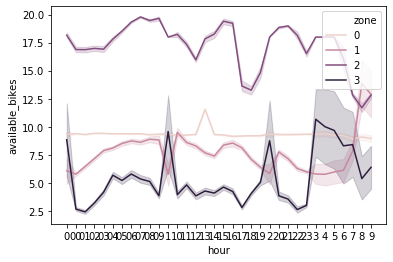

In [36]:
ax = sns.lineplot(x="hour", y="available_bikes", hue="zone",
                  data=df)

In [ ]:
ax = sns.lineplot(x="hour", y="available_bikes", hue="zone",
                  data=df)

                                                   available_bike_stands  \
address                                                                    
140 NUESTRA SEÑORA DE LAS MERCEDES                                  2226   
AAVENIDA DE GRECIA - Aprox. Avda de Italia                          2736   
ALAMEDA DE HERCULES - Aprox. C/ Amor de Dios                       26582   
ALAMEDA DE HERCULES - Aprox. Calle Peris Mencheta                  28615   
ALAMEDA DE HÉRCULES - Aprox. C/ Vulcano                            36490   
...                                                                  ...   
RONDA TAMARGUILLO - Aprox. Marqués de Pickman                      26127   
RONDA TAMARGUILLO - Plaza Ruperto Chapí                            23980   
RONDA URBANA NORTE - Aprox. C/ Doctor Fedriani                     10800   
RONDA URBANA NORTE - Aprox. C/ de Rimas                            20985   
Virgen de Loreto - Aprox. C/ Arcos                                  3634   

           

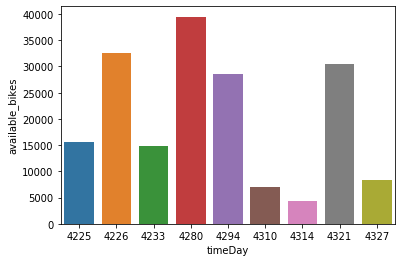

In [93]:
groupedvalues=df_filtrado.groupby('address').sum()
#groupedvalues=df.groupby('timeDay').mean().reset_index()
print(groupedvalues)
sns.barplot(x='timeDay',y='available_bikes' ,data=groupedvalues[1:10]) 

In [58]:
#Una vez preprocesado los datos, lo guardamos en la base de datos con las nuevas columnas
#con = sqlite3.connect("seviBikes.db")
#cur= con.cursor()
#df.to_sql("seviBikes", con,if_exists = 'replace')
